replace gadm41_IND_0.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ga

/tmp/ipython-input-4260415090.py:85: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  haryana["centroid"] = haryana.geometry.centroid


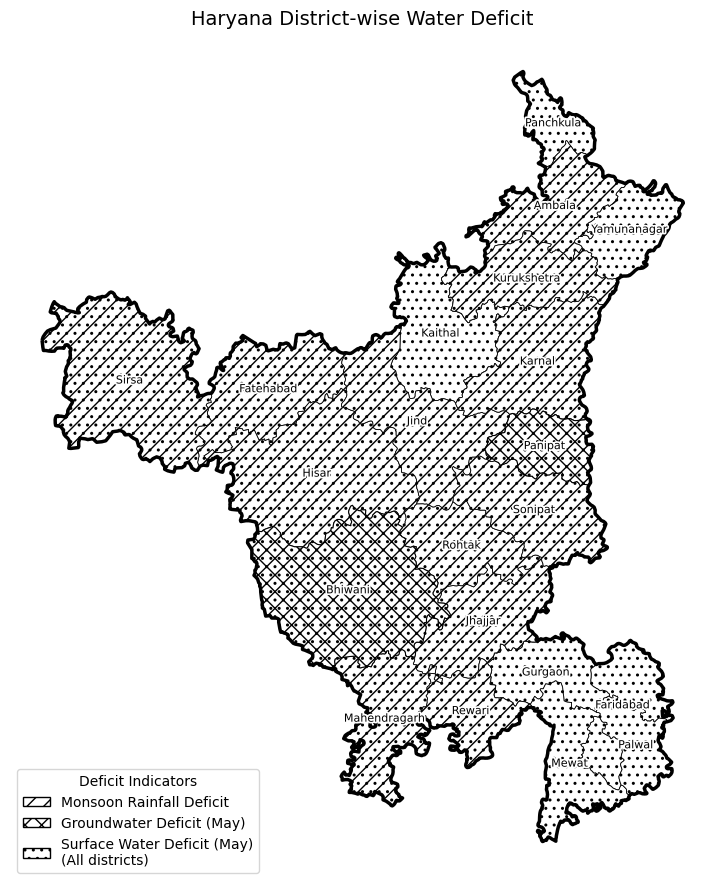

In [11]:

!pip install geopandas matplotlib pandas shapely fiona pyproj


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patheffects as pe


url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_IND_shp.zip"
!wget -q $url
!unzip -q gadm41_IND_shp.zip


gdf = gpd.read_file("gadm41_IND_2.shp")
haryana = gdf[gdf["NAME_1"] == "Haryana"].copy()
haryana = haryana.rename(columns={"NAME_2": "District"})


data = {
    "District": [
        "Ambala","Bhiwani","Charkhi Dadri","Faridabad","Fatehabad","Gurugram",
        "Hisar","Jhajjar","Jind","Kaithal","Karnal","Kurukshetra",
        "Mahendragarh","Nuh","Palwal","Panipat","Panchkula","Rewari",
        "Rohtak","Sirsa","Sonipat","Yamunanagar"
    ],
    "Monsoon_Def": [1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,0],
    "GW_May_Def":  [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
    "SW_May_Def":  [1]*22
}

df = pd.DataFrame(data)


haryana = haryana.merge(df, on="District", how="left")



fig, ax = plt.subplots(1, 1, figsize=(10, 11))

# Base district boundaries
haryana.plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    linewidth=0.6
)

# Monsoon rainfall deficit
haryana[haryana["Monsoon_Def"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch="/ /",
    linewidth=0.6
)

# Groundwater deficit (May)
haryana[haryana["GW_May_Def"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch="x  x",
    linewidth=0.8
)

# Surface water deficit
haryana.plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    hatch=".  .",
    linewidth=0.0
)

# State boundary
haryana.dissolve().boundary.plot(
    ax=ax,
    linewidth=2.5,
    edgecolor="black"
)


haryana["centroid"] = haryana.geometry.centroid

for _, row in haryana.iterrows():
    ax.text(
        row.centroid.x,
        row.centroid.y,
        row["District"],
        fontsize=8,
        color="black",
        ha="center",
        va="center",
        path_effects=[
            pe.withStroke(linewidth=2.5, foreground="white")
        ]
    )



legend_elements = [
    Patch(facecolor="white", edgecolor="black", hatch="//",
          label="Monsoon Rainfall Deficit"),
    Patch(facecolor="white", edgecolor="black", hatch="xx",
          label="Groundwater Deficit (May)"),
    Patch(facecolor="white", edgecolor="black", hatch="..",
          label="Surface Water Deficit (May)\n(All districts)")
]

ax.legend(
    handles=legend_elements,
    title="Deficit Indicators",
    loc="lower left",
    frameon=True
)


ax.set_title(
    "Haryana District-wise Water Deficit",
    fontsize=14
)

ax.axis("off")

plt.savefig(
    "Haryana_Water_Deficit_Pattern_With_Readable_Labels.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


replace gadm41_IND_0.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ga

/tmp/ipython-input-3789117001.py:102: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  haryana["centroid"] = haryana.geometry.centroid


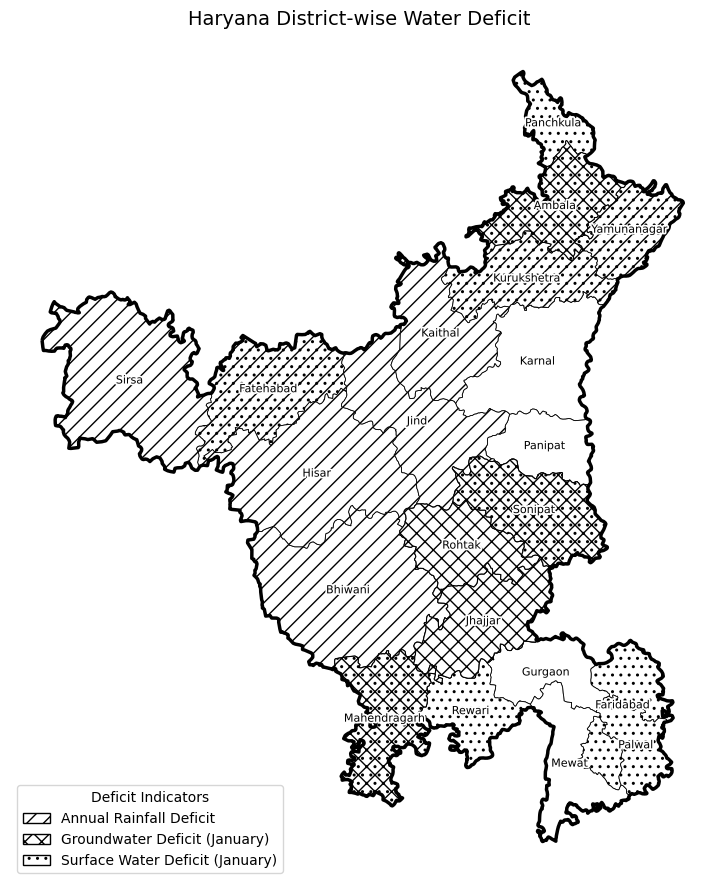

In [10]:
# ==========================================================
# Haryana District-wise Water Deficit (January)
# PATTERN-ONLY + READABLE DISTRICT LABELS | Single Program
# ==========================================================

# 1. Install required libraries
!pip install geopandas matplotlib pandas shapely fiona pyproj

# 2. Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patheffects as pe

# 3. Download GADM India district shapefile
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_IND_shp.zip"
!wget -q $url
!unzip -q gadm41_IND_shp.zip

# 4. Load Haryana districts
gdf = gpd.read_file("gadm41_IND_2.shp")
haryana = gdf[gdf["NAME_1"] == "Haryana"].copy()
haryana = haryana.rename(columns={"NAME_2": "District"})

# 5. Numeric deficit table (January)
data = {
    "District": [
        "Ambala","Bhiwani","Charkhi Dadri","Faridabad","Fatehabad","Gurugram",
        "Hisar","Jhajjar","Jind","Kaithal","Karnal","Kurukshetra",
        "Mahendragarh","Nuh","Palwal","Panipat","Panchkula","Rewari",
        "Rohtak","Sirsa","Sonipat","Yamunanagar"
    ],
    "Annual_Rain_Def": [
        0,1,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,1,1,1,1
    ],
    "GW_Jan_Def": [
        1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
    ],
    "SW_Jan_Def": [
        1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1
    ]
}

df = pd.DataFrame(data)

# 6. Join data
haryana = haryana.merge(df, on="District", how="left")

# ==========================================================
# 7. PLOTTING (PATTERN ONLY)
# ==========================================================

fig, ax = plt.subplots(1, 1, figsize=(10, 11))

# Base district boundaries
haryana.plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    linewidth=0.6
)

# Annual Rainfall Deficit
haryana[haryana["Annual_Rain_Def"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch="/ /",
    linewidth=0.6
)

# Groundwater Deficit (Jan)
haryana[haryana["GW_Jan_Def"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch="x  x",
    linewidth=0.8
)

# Surface Water Deficit (Jan)
haryana[haryana["SW_Jan_Def"] == 1].plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    hatch=".  .",
    linewidth=0.0
)

# State boundary
haryana.dissolve().boundary.plot(
    ax=ax,
    linewidth=2.5,
    edgecolor="black"
)

# ==========================================================
# 8. DISTRICT LABELS (COLOR-REASONABLE)
# ==========================================================

haryana["centroid"] = haryana.geometry.centroid

for _, row in haryana.iterrows():
    ax.text(
        row.centroid.x,
        row.centroid.y,
        row["District"],
        fontsize=8,
        color="black",
        ha="center",
        va="center",
        path_effects=[
            pe.withStroke(linewidth=2.5, foreground="white")
        ]
    )

# ==========================================================
# 9. LEGEND
# ==========================================================

legend_elements = [
    Patch(facecolor="white", edgecolor="black", hatch="//",
          label="Annual Rainfall Deficit"),
    Patch(facecolor="white", edgecolor="black", hatch="xx",
          label="Groundwater Deficit (January)"),
    Patch(facecolor="white", edgecolor="black", hatch="..",
          label="Surface Water Deficit (January)")
]

ax.legend(
    handles=legend_elements,
    title="Deficit Indicators",
    loc="lower left",
    frameon=True
)

# ==========================================================
# 10. FINAL TOUCHES
# ==========================================================

ax.set_title(
    "Haryana District-wise Water Deficit ",
    fontsize=14
)

ax.axis("off")

plt.savefig(
    "Haryana_Water_Deficit_January_Pattern_Map.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


replace gadm41_IND_0.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ga

/tmp/ipython-input-3202463131.py:102: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  haryana["centroid"] = haryana.geometry.centroid


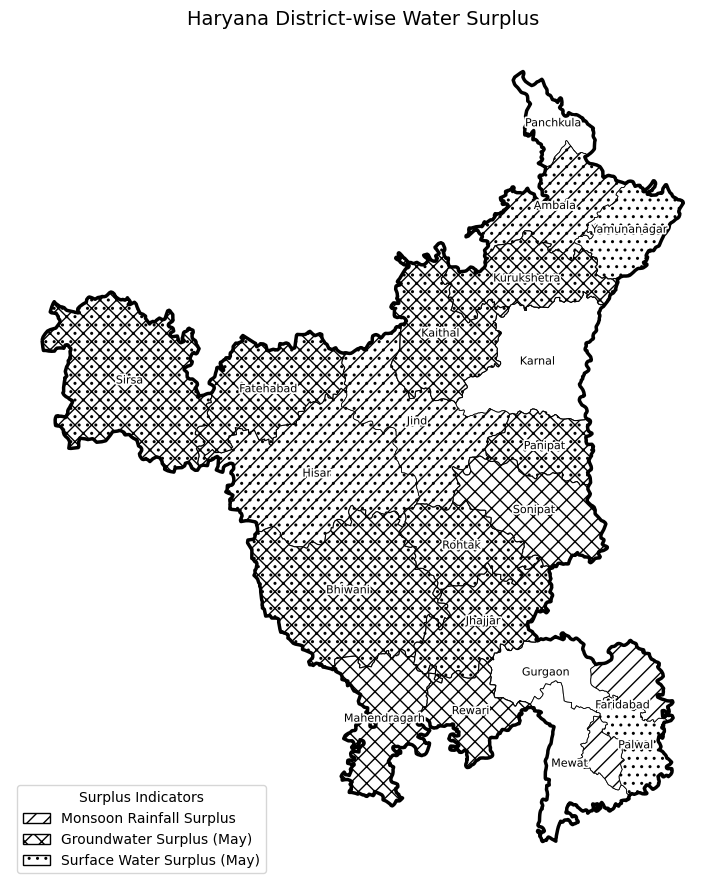

In [12]:
# ==========================================================
# Haryana District-wise Water SURPLUS (May)
# PATTERN-ONLY + READABLE DISTRICT LABELS | Single Program
# ==========================================================

# 1. Install required libraries
!pip install geopandas matplotlib pandas shapely fiona pyproj

# 2. Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patheffects as pe

# 3. Download GADM India district shapefile
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_IND_shp.zip"
!wget -q $url
!unzip -q gadm41_IND_shp.zip

# 4. Load Haryana districts
gdf = gpd.read_file("gadm41_IND_2.shp")
haryana = gdf[gdf["NAME_1"] == "Haryana"].copy()
haryana = haryana.rename(columns={"NAME_2": "District"})

# 5. Numeric surplus table (May)
data = {
    "District": [
        "Ambala","Bhiwani","Charkhi Dadri","Faridabad","Fatehabad","Gurugram",
        "Hisar","Jhajjar","Jind","Kaithal","Karnal","Kurukshetra",
        "Mahendragarh","Nuh","Palwal","Panipat","Panchkula","Rewari",
        "Rohtak","Sirsa","Sonipat","Yamunanagar"
    ],
    "Monsoon_Sur": [
        1,0,0,1,1,0,1,0,1,1,0,1,1,0,0,0,0,1,1,1,1,0
    ],
    "GW_May_Sur": [
        0,1,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,1,0
    ],
    "SW_May_Sur": [
        1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,1
    ]
}

df = pd.DataFrame(data)

# 6. Join data
haryana = haryana.merge(df, on="District", how="left")

# ==========================================================
# 7. PLOTTING (PATTERN ONLY)
# ==========================================================

fig, ax = plt.subplots(1, 1, figsize=(10, 11))

# Base boundaries
haryana.plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    linewidth=0.6
)

# Monsoon Rainfall Surplus
haryana[haryana["Monsoon_Sur"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch="/  /",
    linewidth=0.6
)

# Groundwater Surplus (May)
haryana[haryana["GW_May_Sur"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch="x  x",
    linewidth=0.8
)

# Surface Water Surplus (May)
haryana[haryana["SW_May_Sur"] == 1].plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    hatch=".   .",
    linewidth=0.0
)

# State boundary
haryana.dissolve().boundary.plot(
    ax=ax,
    linewidth=2.5,
    edgecolor="black"
)

# ==========================================================
# 8. DISTRICT LABELS (COLOR-REASONABLE)
# ==========================================================

haryana["centroid"] = haryana.geometry.centroid

for _, row in haryana.iterrows():
    ax.text(
        row.centroid.x,
        row.centroid.y,
        row["District"],
        fontsize=8,
        color="black",
        ha="center",
        va="center",
        path_effects=[
            pe.withStroke(linewidth=2.5, foreground="white")
        ]
    )

# ==========================================================
# 9. LEGEND
# ==========================================================

legend_elements = [
    Patch(facecolor="white", edgecolor="black", hatch="//",
          label="Monsoon Rainfall Surplus"),
    Patch(facecolor="white", edgecolor="black", hatch="xx",
          label="Groundwater Surplus (May)"),
    Patch(facecolor="white", edgecolor="black", hatch="..",
          label="Surface Water Surplus (May)")
]

ax.legend(
    handles=legend_elements,
    title="Surplus Indicators",
    loc="lower left",
    frameon=True
)

# ==========================================================
# 10. FINAL TOUCHES
# ==========================================================

ax.set_title(
    "Haryana District-wise Water Surplus",
    fontsize=14
)

ax.axis("off")

plt.savefig(
    "Haryana_Water_Surplus_May_Pattern_Map.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()


replace gadm41_IND_0.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_0.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_1.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.cpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.prj? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.shp? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace gadm41_IND_2.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ga

/tmp/ipython-input-1846816288.py:102: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  haryana["centroid"] = haryana.geometry.centroid


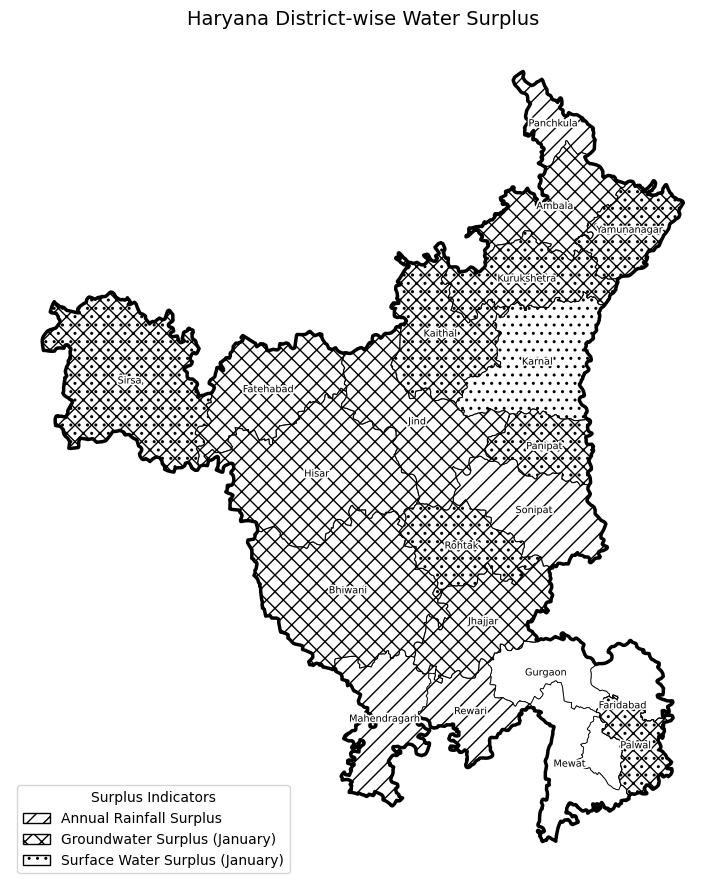

In [13]:
# ==========================================================
# Haryana District-wise Water SURPLUS (January)
# PATTERN-ONLY + READABLE DISTRICT LABELS | Single Program
# ==========================================================

# 1. Install required libraries
!pip install geopandas matplotlib pandas shapely fiona pyproj

# 2. Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.patheffects as pe

# 3. Download GADM India district shapefile
url = "https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_IND_shp.zip"
!wget -q $url
!unzip -q gadm41_IND_shp.zip

# 4. Load Haryana districts
gdf = gpd.read_file("gadm41_IND_2.shp")
haryana = gdf[gdf["NAME_1"] == "Haryana"].copy()
haryana = haryana.rename(columns={"NAME_2": "District"})

# 5. Numeric surplus table (January)
data = {
    "District": [
        "Ambala","Bhiwani","Charkhi Dadri","Faridabad","Fatehabad","Gurugram",
        "Hisar","Jhajjar","Jind","Kaithal","Karnal","Kurukshetra",
        "Mahendragarh","Nuh","Palwal","Panipat","Panchkula","Rewari",
        "Rohtak","Sirsa","Sonipat","Yamunanagar"
    ],
    "Annual_Rain_Sur": [
        0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,1,1,1
    ],
    "GW_Jan_Sur": [
        1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,1,0,0,1,1,0,1
    ],
    "SW_Jan_Sur": [
        0,0,0,0,0,1,0,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1
    ]
}

df = pd.DataFrame(data)

# 6. Join data
haryana = haryana.merge(df, on="District", how="left")

# ==========================================================
# 7. PLOTTING (PATTERN ONLY)
# ==========================================================

fig, ax = plt.subplots(1, 1, figsize=(10, 11))

# Base boundaries
haryana.plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    linewidth=0.6
)

# Annual Rainfall Surplus
haryana[haryana["Annual_Rain_Sur"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch="/   /",
    linewidth=0.6
)

# Groundwater Surplus (January)
haryana[haryana["GW_Jan_Sur"] == 1].plot(
    ax=ax,
    facecolor="white",
    edgecolor="black",
    hatch="x   x",
    linewidth=0.8
)

# Surface Water Surplus (January)
haryana[haryana["SW_Jan_Sur"] == 1].plot(
    ax=ax,
    facecolor="none",
    edgecolor="black",
    hatch=".   .",
    linewidth=0.0
)

# State boundary
haryana.dissolve().boundary.plot(
    ax=ax,
    linewidth=2.5,
    edgecolor="black"
)

# ==========================================================
# 8. DISTRICT LABELS (COLOR-REASONABLE)
# ==========================================================

haryana["centroid"] = haryana.geometry.centroid

for _, row in haryana.iterrows():
    ax.text(
        row.centroid.x,
        row.centroid.y,
        row["District"],
        fontsize=7,
        color="black",
        ha="center",
        va="center",
        path_effects=[
            pe.withStroke(linewidth=2.5, foreground="white")
        ]
    )

# ==========================================================
# 9. LEGEND
# ==========================================================

legend_elements = [
    Patch(facecolor="white", edgecolor="black", hatch="//",
          label="Annual Rainfall Surplus"),
    Patch(facecolor="white", edgecolor="black", hatch="xx",
          label="Groundwater Surplus (January)"),
    Patch(facecolor="white", edgecolor="black", hatch="..",
          label="Surface Water Surplus (January)")
]

ax.legend(
    handles=legend_elements,
    title="Surplus Indicators",
    loc="lower left",
    frameon=True
)

# ==========================================================
# 10. FINAL TOUCHES
# ==========================================================

ax.set_title(
    "Haryana District-wise Water Surplus",
    fontsize=14
)

ax.axis("off")

plt.savefig(
    "Haryana_Water_Surplus_January_Pattern_Map.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()
